# Data Exploration: Basic statistics, plots(missing values, labels, other insights)
1. Summary Statistics
1. Histogram, Countplot

# Data Cleaning: deal with format and text file
1. Lowercase
1. Remove numbers
1. Encode Emojis
1. Remove additional white spaces
1. Convert short words (I'm, He's)
1. Convert URL
1. Stemming
1. Remove Punctuation
1. Stop word removal

In [1]:
#!python -m spacy download en_core_web_sm
#!pip3 install -U pywsd
import nltk
#nltk.download('omw-1.4')

In [2]:
# import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
import spacy

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
#from pywsd.utils import lemmatize_sentence

import itertools
from tqdm.auto import tqdm
tqdm.pandas()
from multiprocessing import Pool

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
# settings
text_cols = ['text']
cores = 6

In [4]:
columns = ["target", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv',
                 encoding = "ISO-8859-1", names=columns)

In [5]:
#df = df.sample(100000, random_state = 1234)
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# summary statistics

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [35]:
df.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [36]:
# check missing values
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

# plots

In [37]:
decode_map = {0: "negative", 4: "positive"}
df.target = df.target.apply(lambda x: decode_map[x])

plot length of sentence

In [6]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

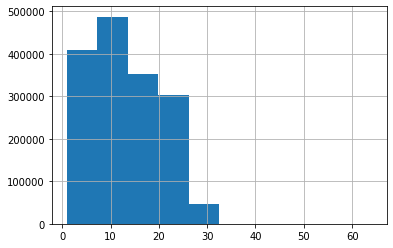

In [7]:
plot_word_number_histogram(df['text'])

Plot length of words

In [21]:
def plot_word_length_histogram(text):
    x = text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x))
    plt.hist(x, bins = 15, range=(0, 15))
    plt.savefig('histogram_word_length.png')

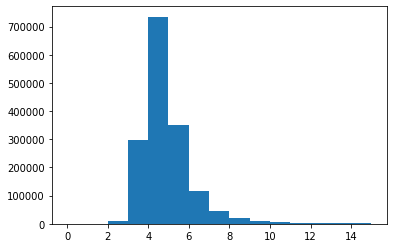

In [22]:
plot_word_length_histogram(df['text'])

In [23]:
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    plt.savefig('histogram_top_stopword.png')

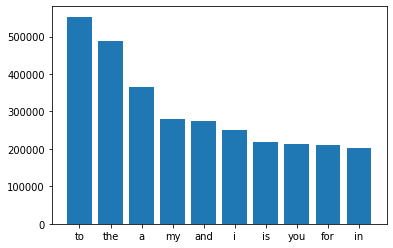

In [24]:
plot_top_stopwords_barchart(df['text'])

In [38]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [39]:
words_neg = " ".join(i for i in df[df.target == "negative"]['text'])
words_pos = " ".join(i for i in df[df.target == "positive"]['text'])

In [40]:
stopwords = set(STOPWORDS)
wordcloud_neg = WordCloud(stopwords=stopwords,collocations = True,
                      background_color="white", colormap = "afmhot").generate(words_neg)
wordcloud_pos = WordCloud(stopwords=stopwords,collocations = True,
                      background_color="white", colormap = "Set1").generate(words_pos)

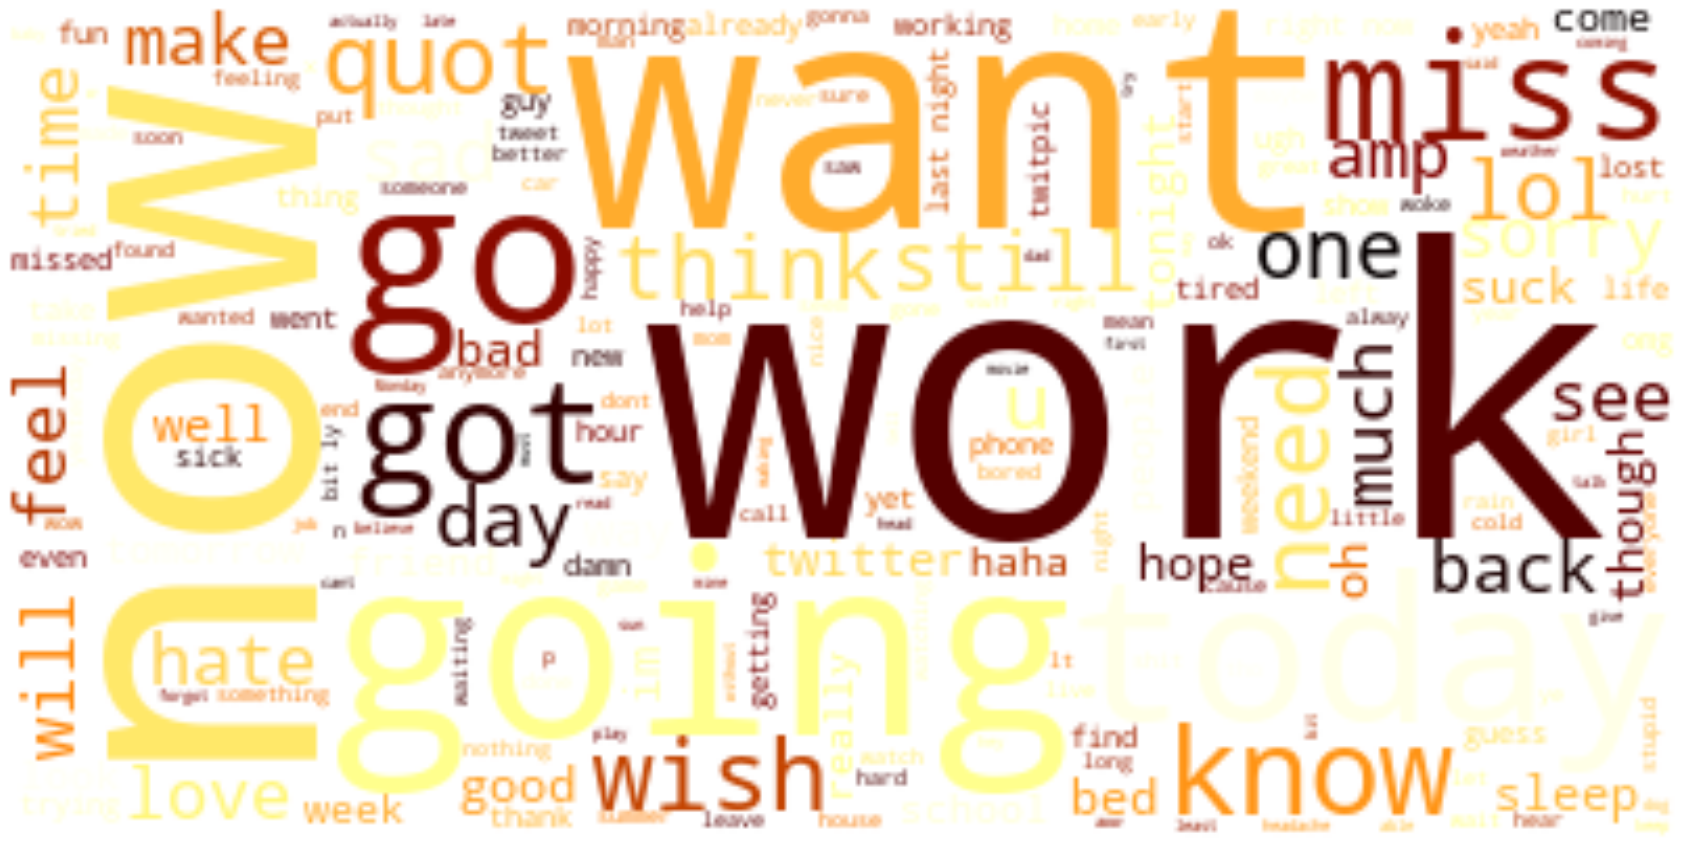

In [41]:
plt.figure(figsize=(30,20))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud_negative.png')
plt.show()

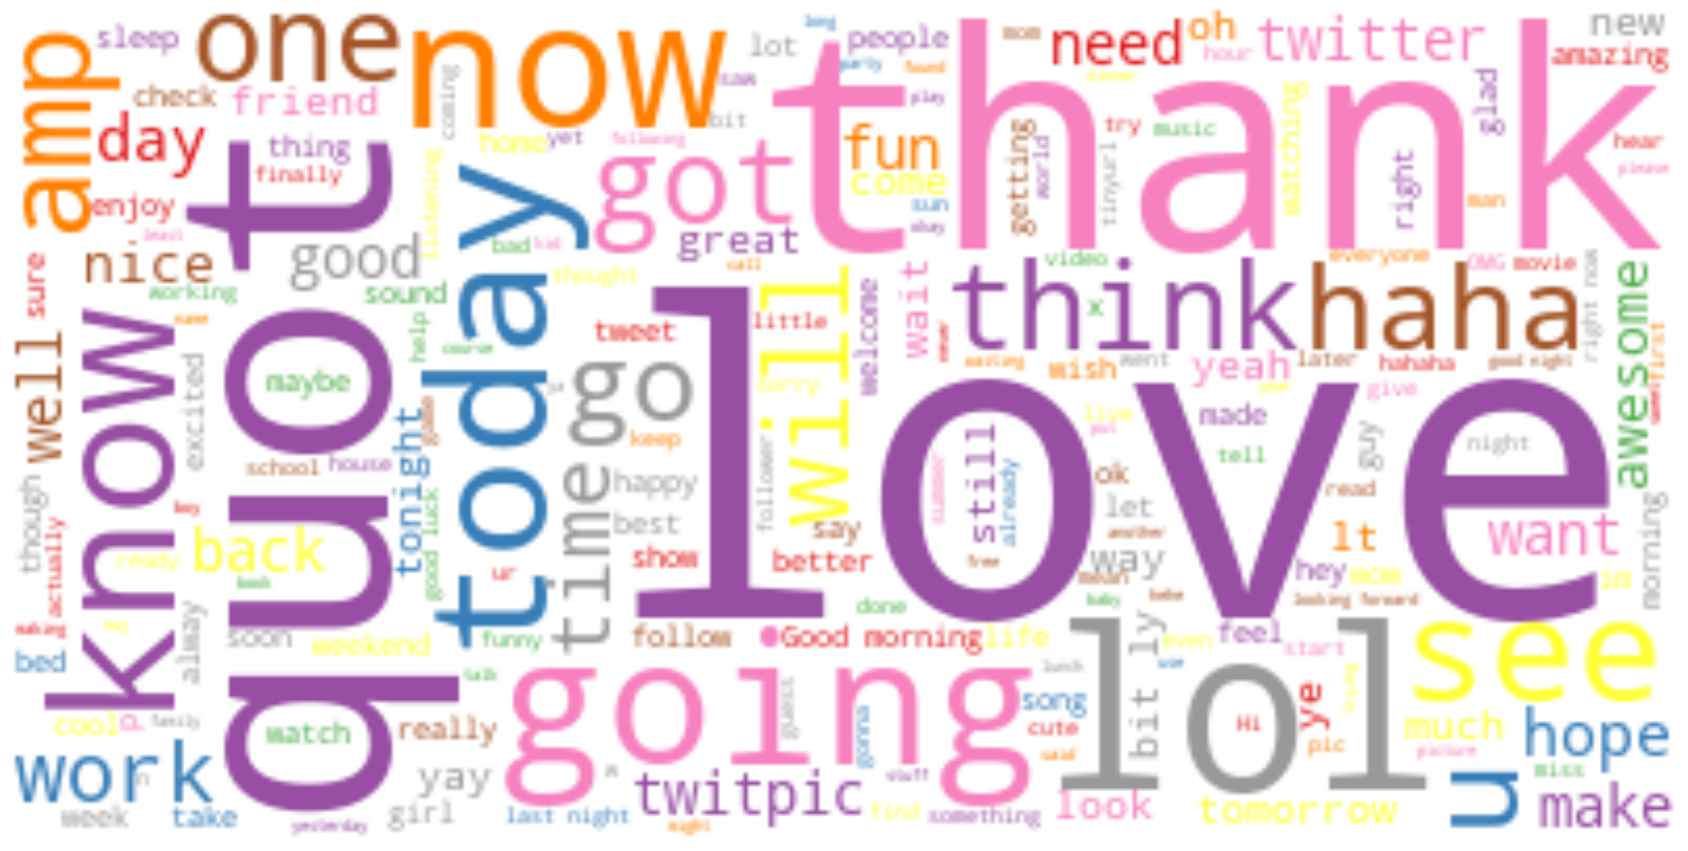

In [42]:
plt.figure(figsize=(30,20))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud_positive.png')
plt.show()

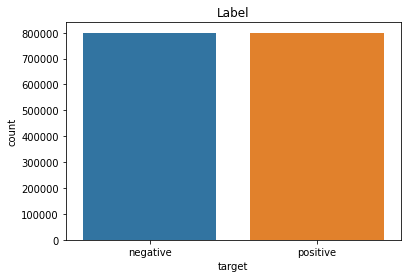

In [43]:
ax = sns.countplot(x=df['target'])
ax.set_title('Label')
plt.savefig('label.png')

Text(0.5, 1.0, 'Flag')

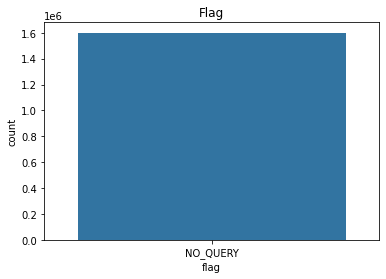

In [44]:
ax = sns.countplot(x=df['flag'])
ax.set_title('Flag')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Flag')

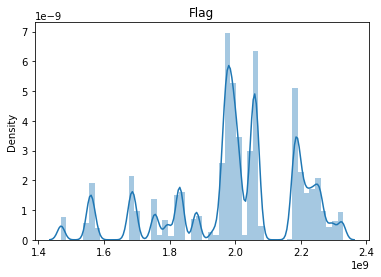

In [45]:
ax = sns.distplot(x=df['ids'].astype(int))
ax.set_title('Flag')

In [46]:
# delete all useless columns
non_comment_cols = ['ids', 'date', 'flag','user']
df_other = df[non_comment_cols]
df = df.drop(non_comment_cols, axis = 1)

In [47]:
df.head(20)

,target,text
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,is upset that he can't update his Facebook by ...
2,negative,@Kenichan I dived many times for the ball. Man...
3,negative,my whole body feels itchy and like its on fire
4,negative,"@nationwideclass no, it's not behaving at all...."
5,negative,@Kwesidei not the whole crew
6,negative,Need a hug
7,negative,@LOLTrish hey long time no see! Yes.. Rains a...
8,negative,@Tatiana_K nope they didn't have it
9,negative,@twittera que me muera ?


In [48]:
df_other.head()

,ids,date,flag,user
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli


In [49]:
# show 2 examples
df['text'][242818]

"@3nalicious and I'm sorry to hear about your cat  x"

In [50]:
df['text'][1236895]

'@PsychicSophie Thank you! '

# Preprocessing

In [51]:
# all possible emojis
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [52]:
# lowercase
def lower(df, cols):
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: x.lower())
    return df

# number removing
def num_remove(df, cols):
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: re.sub(r'\d+', '', x))
    return df

# white spaces removal
def space_remove(df,cols):
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: x.strip()) # remove front and end space
        df[col] = df[col].str.replace('\s+', ' ', regex=True) # remove double space
    return df

def to_sentence(df,cols):
    # join words to a sentence
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: ' '.join(x))
    return df

# emojis converter
def emoji_converter(sentence):
    for emoji in emojis.keys():
        sentence = sentence.replace(emoji, " " + emojis[emoji])
    return sentence

def emojis_converter(df, cols):
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: emoji_converter(x))
    return df



# punctuation removal
def punc_remove(df,cols):
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    return df

'''
def get_lemmas(doc):
    return ' '.join(tok.lemma_.lower() for tok in doc)
def lemmazation(df,cols):
    spacy.prefer_gpu()
    nlp = spacy.load("en_core_web_sm")
    def get_sentence(x):
        docs = nlp.pipe(x.split())
        return list(get_lemmas(doc) for doc in docs)
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: get_sentence(x))
    df = to_sentence(df,cols)
    return df


def lemmazation(df,cols):
    lmtzr = WordNetLemmatizer()
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: lemmatize_sentence(x))
    df = to_sentence(df,cols)
    return df
'''
# stemming
def stemming(df,cols):
    porter_stemmer  = PorterStemmer()
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: [porter_stemmer.stem(w) for w in x.split()])
    df = to_sentence(df,cols)
    return df

# convert short words and urls
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    urlPattern = r"((http://)|(https://)|( www\.)|(com)|(net)|(org))"
    phrase = re.sub(urlPattern,'',phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# convert cases such as he's, I'm, ...
def short_word_converter(df,cols):
    nlp = spacy.load("en_core_web_sm")
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: decontracted(x))
    return df

'''
# this one is slow
# convert cases such as he's, I'm, ...
def short_word_converter(df,cols):
    nlp = spacy.load("en_core_web_sm")
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))
    return df
'''
                                       
# stop word removal
def stop_remove(df,cols):
    stops = set(stopwords.words('english'))
    for col in tqdm(cols):
        df[col] = df[col].progress_apply(lambda x: ' '.join([word for word in x.split() if word not in stops]))
    #df = to_sentence(df,cols)
    return df

# run all preprocessing functions
def preprocess(df,cols):
    df[cols] = lower(df,cols)[cols]
    df[cols] = num_remove(df,cols)[cols]
    df[cols] = emojis_converter(df,cols)[cols]
    df[cols] = space_remove(df,cols)[cols]
    df[cols] = short_word_converter(df,cols)[cols] 
    df[cols] = stemming(df,cols)[cols] 
    df[cols] = punc_remove(df,cols)[cols]
    df[cols] = stop_remove(df,cols)[cols]
    return df

In [54]:
# print(df['text'][:10])
# df = preprocess(df,text_cols)
# print(df['text'][:10])

In [ ]:
print(df.shape)

In [ ]:
# save the dataframe for further uses
df.to_csv('./df.csv',index=False)

# download data
<a href="df.csv"> df </a>